# Project 5

## Q4.a

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
#Load Data
college_data = pd.read_csv("./p5-data/college_data.csv")
names=college_data['ShortHandName']



In [36]:
cdata = college_data.iloc[:,3:]

In [37]:
#Standarizing the features
scdata = StandardScaler().fit_transform(cdata.values)
cdataScaled = pd.DataFrame(data= scdata, columns=cdata.columns)



In [38]:
#PCA
pca = PCA()
pca.fit(cdataScaled)
X=pca.fit_transform(cdataScaled)


## b

In [39]:
# PC scores
#pca = PCA(n_components=2)


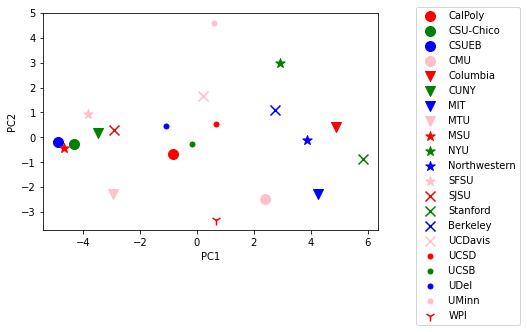

In [40]:
markers=['o','v','*','x','.','1']
colors=['r','g','b','pink']

fig,ax=plt.subplots()
for i in range(len(names)):
    plt.scatter(X[i,0], X[i,1],c=colors[i%4],marker=markers[int(i/4)],label=names[i],s=100)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc="upper left",bbox_to_anchor=(1.1, 1.05))

    


## C

Text(0, 0.5, 'Proportion of Variance Explained')

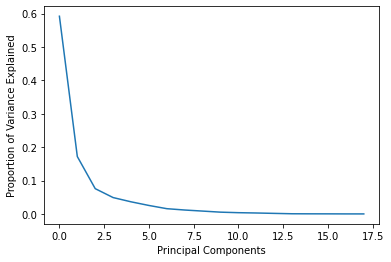

In [41]:
#Explianing Variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained")

need 3 prinipal componets.

# 5

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## a

In [43]:
#Load Data
stock20 = pd.read_csv("./p5-data/stock_data_2020.csv")
s20data = stock20.iloc[:,1:]
#Standarizing the features
ss20data = StandardScaler().fit_transform(s20data.values)
s20dataScaled = pd.DataFrame(data= ss20data, columns=s20data.columns)


In [44]:
# PCA
pca = PCA()
pca.fit(s20dataScaled)
pc = pd.DataFrame(pca.components_)
pc.columns = s20data.columns



## b

(252, 30)
PC1 weight
Company: INTC,weight:0.014130887485553583
Company: WBA,weight:-0.024833951618615926
Company: XOM,weight:-0.0864769399726413
Company: CSCO,weight:-0.10452365713313751
Company: CVX,weight:-0.12020060238945023
Company: WMT,weight:-0.12308512960085921
Company: MSFT,weight:-0.14150284214612222
Company: RTX,weight:-0.14187144551578681
Company: IBM,weight:-0.15830363426424418
Company: BA,weight:-0.1598642014140051
PC2 weight
Company: WBA,weight:-0.024833951618615926
Company: XOM,weight:-0.0864769399726413
Company: CVX,weight:-0.12020060238945023
Company: RTX,weight:-0.14187144551578681
Company: INTC,weight:0.014130887485553583
Company: BA,weight:-0.1598642014140051
Company: IBM,weight:-0.15830363426424418
Company: CSCO,weight:-0.10452365713313751
Company: JPM,weight:-0.19579292234076806
Company: AXP,weight:-0.21386782976072413


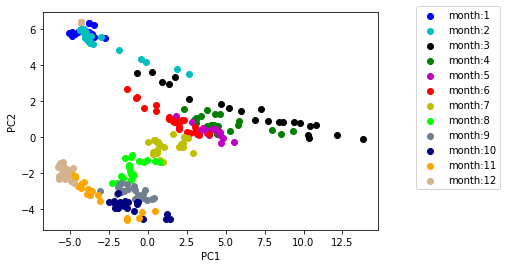

In [57]:
# PC scores
#pca = PCA(n_components=2)
import re
fig,ax=plt.subplots()
X = pca.fit_transform(s20dataScaled)
print(X.shape)
date=stock20["Date"].to_numpy()
month_re=re.compile("([0-9]+)/[0-9]+/[0-9]+")
colors=['b','c','k','g','m','r','y',"lime","slategrey","navy","orange","tan"]
month=np.array([month_re.findall(date_) for date_ in date])
comp=pca.components_
titles=stock20.columns
print("PC1 weight")
comp_sort_idx=np.argsort(comp[0])
comp_sort_idx=comp_sort_idx[::-1]
for i in range(10):
    print(f"Company: {titles[comp_sort_idx[i]+1]},weight:{comp[0][comp_sort_idx[i]]}")


print("PC2 weight")
comp_sort_idx=np.argsort(comp[1])
comp_sort_idx=comp_sort_idx[::-1]
for i in range(10):
    print(f"Company: {titles[comp_sort_idx[i]+1]},weight:{comp[0][comp_sort_idx[i]]}")

for i in range(1,13):
    index=np.where(month==str(i))
    ax.scatter(X[index,0],X[index,1],label=f"month:{i}",color=f"{colors[i-1]}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc="upper left",bbox_to_anchor=(1.1, 1.05))


## C
according to the graph in B, I find the data is mainly grouped by month. and according to the contribution, for the PC1,Intel,WBA,XOM contribute the top3, for the PC2,WBA,XOM,CVT contribute the top3,also msft and intel contribut top 5 in the list.

## d


(251, 30)
PC1 weight
Company: DD,weight:0.2060236013371323
Company: MMM,weight:0.19648940573778356
Company: PFE,weight:0.17053033350266542
Company: WBA,weight:0.16732172231422893
Company: XOM,weight:0.1484868633582629
Company: BA,weight:0.11369128120938732
Company: CSCO,weight:0.02132816058192615
Company: JPM,weight:-0.02727082565192312
Company: JNJ,weight:-0.02727082565192312
Company: UNH,weight:-0.030765968943874178
PC2 weight
Company: MCD,weight:-0.185075208369909
Company: KO,weight:-0.23797399751718612
Company: TRV,weight:-0.1434693865366517
Company: HD,weight:-0.23848565692565815
Company: PG,weight:-0.2608757499379417
Company: WMT,weight:-0.2543287970827264
Company: V,weight:-0.26061080188707314
Company: DIS,weight:-0.2310544039847101
Company: AXP,weight:-0.22300950066647465
Company: MSFT,weight:-0.263286092192122


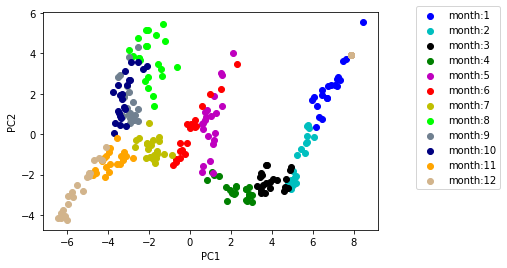

In [58]:
#Load Data
stock19 = pd.read_csv("./p5-data/stock_data_2019.csv")
s19data = stock19.iloc[:,1:]
#Standarizing the features
ss19data = StandardScaler().fit_transform(s19data.values)
s19dataScaled = pd.DataFrame(data= ss19data, columns=s19data.columns)
pca = PCA()
pca.fit(s19dataScaled)
pc = pd.DataFrame(pca.components_)
pc.columns = s19data.columns
import re
fig,ax=plt.subplots()
X = pca.fit_transform(s19dataScaled)
print(X.shape)
date=stock19["Date"].to_numpy()
month_re=re.compile("([0-9]+)/[0-9]+/[0-9]+")
colors=['b','c','k','g','m','r','y',"lime","slategrey","navy","orange","tan"]
month=np.array([month_re.findall(date_) for date_ in date])

comp=pca.components_
titles=stock19.columns


print("PC1 weight")
comp_sort_idx=np.argsort(comp[0])
comp_sort_idx=comp_sort_idx[::-1]
for i in range(10):
    print(f"Company: {titles[comp_sort_idx[i]+1]},weight:{comp[0][comp_sort_idx[i]]}")


print("PC2 weight")
comp_sort_idx=np.argsort(comp[1])
comp_sort_idx=comp_sort_idx[::-1]
for i in range(10):
    print(f"Company: {titles[comp_sort_idx[i]+1]},weight:{comp[0][comp_sort_idx[i]]}")


for i in range(1,13):
    index=np.where(month==str(i))
    ax.scatter(X[index,0],X[index,1],label=f"month:{i}",color=f"{colors[i-1]}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc="upper left",bbox_to_anchor=(1.1, 1.05))



Compare to 2020, 2019 DD MM PFE contribute top3 of the PC1 and MCD,KO,PRV contribute top3 of PC2, there are no It company here in the top list like intel and msft

# Q6

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## a)

In [60]:
# Load
from os import listdir
from os.path import isfile, join
import re

# get the file names and sort them by year
num=re.compile(r"a([0-9]+)\.txt")
listfiles = [f for f in listdir("p5-data/sotu/files/") if isfile(join("p5-data/sotu/files", f))]
def get_number(x):
    return int(num.findall(x)[0])
listfiles=sorted(listfiles,key=get_number)

# read the files, store the files into the corpus array
corpus = []
for fi in listfiles:
    file_path = "p5-data/sotu/files/%s" % (fi)
    with open(file_path) as f:
        corpus.append(f.read())
        f.close()

# build the TD martix for later use
vectorizer = CountVectorizer(input='content')
X = vectorizer.fit_transform(corpus)
partiys=open("p5-data/sotu/party.txt").read().splitlines()[0:-1]
partiys_name=[line[0] for line in partiys]

person=re.compile("...(.*), [0-9]+")
person_name=[person.findall(line)[0] for line in partiys]

year=re.compile(".*, ([0-9]+)$")
year_name=[year.findall(line)[0] for line in partiys]

## b remove the stop words

In [75]:
# build a new matrix without stopwds

with open("p5-data/sotu/stopwords.txt") as f:
    stopwds = f.read().lower().splitlines()
    f.close()
vectorizer = CountVectorizer(input='content', 
                             stop_words = stopwds)
X = vectorizer.fit_transform(corpus)

# create Document-Term Matrix / DataFrame
Xframe = pd.DataFrame(X.toarray(), 
                      index=listfiles, 
                      columns=vectorizer.get_feature_names())


/Users/jiangqiushen/.conda/envs/ml/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'daren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


## c predict


In [79]:
# build the tranning set
# get the index of Democratic and Republican

## c.i, build the TD martix with top 3000 words and without stopwds
vectorizer = CountVectorizer(input='content', 
                             stop_words = stopwds,max_features=3000)
X = vectorizer.fit_transform(corpus)

# create Document-Term Matrix / DataFrame

# c.ii, build the trainning seet, exclude the testing address and keep only r and d party
filter_out=['trump 2017','obama 2014','bush 2006','clinton 1995','kennedy 1962']
file_names=[]

# build the training set
#trainning set of the address party name
selected_name=[]
#trainning set of the address speaker name
selected_person=[]
#trainning set of the address year
selected_year=[]
#trainning set of the address content
selected_corp=[]


for i in range(231):
    # only contain republican and democracan
    if partiys_name[i]=='r' or partiys_name[i]=='d':
        # filter out the test case
        if not f"{person_name[i]} {year_name[i]}" in filter_out:
            # add the address into the trainning set
            selected_person.append(person_name[i])
            selected_year.append(year_name[i])
            selected_name.append(partiys_name[i])
            selected_corp.append(X[i].toarray().reshape(-1))
            file_names.append(f"a{i+1}.txt")

selected_corp=np.array(selected_corp)
Xframe = pd.DataFrame(X.toarray(), 
                      index=listfiles, 
                      columns=vectorizer.get_feature_names())
#the training set frame
Xfram_traning=pd.DataFrame(selected_corp,index=file_names, 
                      columns=vectorizer.get_feature_names())
print("title:the td martix with 3000 top words")                    
print(Xfram_traning.iloc[0:10,0:5])



/Users/jiangqiushen/.conda/envs/ml/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'daren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
title:the td martix with 3000 top words
         abandon  abandoned  ability  abolished  abolition
a41.txt        1          1        1          1          0
a42.txt        0          1        3          0          0
a43.txt        0          3        1          1          0
a44.txt        2          0        0          0          1
a45.txt        0          0        0          1          0
a46.txt        2          0        2          0          0
a47.txt        1          0        1   

## c.ii

In [85]:

# start to predict
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
# 0==repu 1==demo
# classes, 0="r",1="d"
classes=np.array([ 0 if party=='r' else 1 for party in selected_name])
class_name=['republican','democratic']
bnb=BernoulliNB()
# fit the tranning set

bnb.fit(Xfram_traning,classes)

# the index of the testing set
filter_out_index=[230,227,219,208,174]
print("BernoulliNB result")
for i in filter_out_index:
    result=bnb.predict_proba(Xframe.to_numpy()[i].reshape(1,-1))
    print(f"real:{person_name[i]}-{year_name[i]} from {partiys_name[i]}, predict: {result}")
classes=np.array([ 0 if party=='r' else 1 for party in selected_name])
class_name=['republican','democratic']



BernoulliNB result
real:trump-2017 from r, predict: [[2.91360252e-20 1.00000000e+00]]
real:obama-2014 from d, predict: [[1.16164237e-25 1.00000000e+00]]
real:bush-2006 from r, predict: [[6.33504456e-18 1.00000000e+00]]
real:clinton-1995 from d, predict: [[1.15128904e-22 1.00000000e+00]]
real:kennedy-1962 from d, predict: [[2.44231637e-06 9.99997558e-01]]


## C.iii

In [84]:
# multinimianNB
bnb=MultinomialNB()
# fit the tranning set
bnb.fit(Xfram_traning,classes)
filter_out_index=[230,227,219,208,174]
print("multinomialNB result")
for i in filter_out_index:
    result=bnb.predict_proba(Xframe.to_numpy()[i].reshape(1,-1))
    print(f"real:{person_name[i]}-{year_name[i]} from {partiys_name[i]}, predict: {result}")


multinomialNB result
real:trump-2017 from r, predict: [[1.99249913e-35 1.00000000e+00]]
real:obama-2014 from d, predict: [[1.90586626e-121 1.00000000e+000]]
real:bush-2006 from r, predict: [[3.34995948e-20 1.00000000e+00]]
real:clinton-1995 from d, predict: [[2.1393714e-93 1.0000000e+00]]
real:kennedy-1962 from d, predict: [[5.06189705e-45 1.00000000e+00]]


## Q7

In [92]:
#Q7 implement BernoulliNb and MultinomialNB
import numpy as np
#my bernoulli
class myBernoulliNB:
    def __init__(self):
        self.is_fit=False
        
        pass
    #input: X:td-array, y:classes 
    def fit(self,X,y):
        self.class_count=dict()
        self.prior=dict()
        for c in y:
            if c in self.class_count:
                self.class_count[c]=self.class_count[c]+1
            else:
                self.class_count[c]=1

        self.N=X.shape[0]
        
        for key in self.class_count:
            self.prior[key]=self.class_count[key]/self.N
        #for each vocabulary
        self.condprob=np.zeros([X.shape[1],len(self.class_count)])
        for i in range(X.shape[1]):
            for key in self.class_count:
                Nc=self.class_count[key]
                # i is the vocabuler, key is the class number
                Nct=0
                for j in range(self.N):
                    if y[j]==key and X[j,i]!=0:
                        Nct+=1
                self.condprob[i][key]=(Nct+1)/(Nc+2)
        self.is_fit=True
        pass
    #input X: a singe document TD array. or vector or 2d array.
    def predict_prob_log(self,X):
        if not self.is_fit:
            print("fit before predict")
            return None

        scores=[]
        for i in range(X.shape[0]):
            score=np.zeros(len(self.class_count))

            for key in self.class_count:
                score[key]=np.log(self.prior[key])
                for j in range(X.shape[1]):
                    if X[i,j]!=0:
                        score[key]+=np.log(self.condprob[j][key])
                    else:
                        score[key]+=np.log(1-self.condprob[j][key])

            scores.append(score)

        return np.array(scores,dtype=float)
        pass

    def predict_prop(self,X):
        log=self.predict_prob_log(X)
        return np.exp(log,dtype=float)
    pass


class myMultinomialNB:
    def __init__(self):
        self.is_fit=False

        pass
    def fit(self,X,y):
        self.class_count=dict()
        self.prior=dict()
        for c in y:
            if c in self.class_count:
                self.class_count[c]=self.class_count[c]+1
            else:
                self.class_count[c]=1

        self.N=X.shape[0]
        
        for key in self.class_count:
            self.prior[key]=self.class_count[key]/self.N
        #for each vocabulary
        self.condprob=np.zeros([X.shape[1],len(self.class_count)])
        
        for key in self.class_count:
            Nc=self.class_count[key]
            
            Nctt=0
            for j in range(self.N):
                if y[j]==key:
                    Nctt+=np.sum(X[j])
            for i in range(X.shape[1]):
                #print("word",i)
                # i is the vocabuler, key is the class number
                Nct=0
                for j in range(self.N):
                    if y[j]==key and X[j,i]!=0:
                        Nct+=X[j,i]

                self.condprob[i][key]=(Nct+1)/(Nctt+X.shape[1])
        self.is_fit=True
        pass
    
    #input X: a singe document TD vector
    def predict_prob_log(self,X):
        if not self.is_fit:
            print("fit before predict")
            return None

        scores=[]
        for i in range(X.shape[0]):
            score=np.zeros(len(self.class_count))

            for key in self.class_count:
                #print("key,prior",key,self.prior[key])
                score[key]=np.log(self.prior[key])
                for j in range(X.shape[1]):
                    if X[i,j]!=0:
                        #print("cond,j,key",self.condprob[j][key],X[i,j])
                        score[key]+=np.log(self.condprob[j][key])*X[i,j]


                        
            scores.append(score)

        return np.array(scores,dtype=float)
        pass

    def predict_prop(self,X):
        log=self.predict_prob_log(X)
        return np.exp(log,dtype=float)
    pass

    pass
#. test the prop using text book example
docs=["chinese beijing chinese","chinese chinese shanghai","chinese macao","tokyo japan chinese","chinese chinese chinese tokyo japan"]
c=[1,1,1,0]
vectorizer = CountVectorizer(input='content')
X_simple_test=vectorizer.fit_transform(docs)

# test the model
# first the sklearn result
m=myBernoulliNB()
m.fit(X_simple_test[0:4],c)
print("result of propability of the testing text:chinese chinese chinese tokyo japan, the result in text book is 0.022,0.005")
print(m.predict_prop(X_simple_test[4]))

m=myMultinomialNB()
m.fit(X_simple_test[0:4],c)
print("result of propability of the testing text:chinese chinese chinese tokyo japan, the result in text book is 0.0001,0.0003")

result=m.predict_prop(X_simple_test[4])
print(result)
print("the result matches the textbook")

result of propability of the testing text:chinese chinese chinese tokyo japan, the result in text book is 0.022,0.005
[[0.02194787 0.005184  ]]
result of propability of the testing text:chinese chinese chinese tokyo japan, the result in text book is 0.0001,0.0003
[[0.00013548 0.00030121]]
the result matches the textbook


## Q7.a,b


In [94]:
# test the Q7
print("the log prop of myBernoulliNB")
m=myBernoulliNB()
m.fit(selected_corp,classes)
filter_out_index=[230,227,219,208,174]
for i in filter_out_index:
    result=m.predict_prob_log(X[i].reshape(1,-1))
    print(f"real:{person_name[i]}-{year_name[i]} from {partiys_name[i]}, predict: {result}")

print("\nthe log prop of myMultinomialNB")

m=myMultinomialNB()
m.fit(selected_corp,classes)
filter_out_index=[230,227,219,208,174]
for i in filter_out_index:
    result=m.predict_prob_log(X[i].reshape(1,-1))
    print(f"real:{person_name[i]}-{year_name[i]} from {partiys_name[i]}, predict: {result}")


the log prop of myBernoulliNB
real:trump-2017 from r, predict: [[-1565.90456574 -1520.92225418]]
real:obama-2014 from d, predict: [[-1694.88505685 -1637.47026436]]
real:bush-2006 from r, predict: [[-1613.18172459 -1573.58128976]]
real:clinton-1995 from d, predict: [[-1553.86435364 -1503.34836382]]
real:kennedy-1962 from d, predict: [[-1647.4674667 -1634.5449055]]

the log prop of myMultinomialNB
real:trump-2017 from r, predict: [[-11341.66862888 -11261.76754032]]
real:obama-2014 from d, predict: [[-16958.091637   -16680.12377738]]
real:bush-2006 from r, predict: [[-13655.57722067 -13610.73446706]]
real:clinton-1995 from d, predict: [[-15077.12097302 -14863.74107142]]
real:kennedy-1962 from d, predict: [[-16134.32802602 -16032.33343816]]


## Q.8

In [100]:
#Q8 congress
from sklearn.preprocessing import StandardScaler

data_frame_116=pd.read_csv("p5-data/congress/H116_votes.csv")
data_frame_116_cut=data_frame_116.iloc[:,8:]
data_frame_116_trans=StandardScaler().fit_transform(data_frame_116_cut)
data_frame_116_trans=pd.DataFrame(data_frame_116_trans,columns=data_frame_116_cut.columns)

## Q8.a, plot

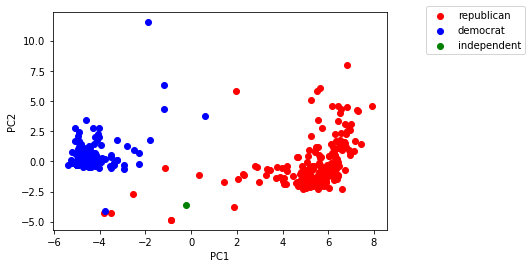

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_frame_116_trans)
X=pca.transform(data_frame_116_trans)

fig,ax=plt.subplots()
color_map={200:"r",100:"b",328:"g"}
label_map={200:"republican",100:"democrat",328:"independent"}

for code in [200,100,328]:
    index=np.where(data_frame_116['PartyCode']==code)
    ax.scatter(X[index,0],X[index,1],c=color_map[code],label=label_map[code])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc="upper left",bbox_to_anchor=(1.1, 1.05))

## Q8.b, select 4 points

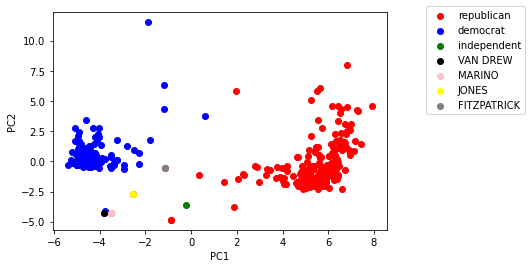

In [102]:
# for all republican party address
index=np.where(data_frame_116['PartyCode']==200)
# find the most small PC1 value of top4
sub_index=np.argsort(X[index,0])[0][0:4]

abs_index=index[0][sub_index]

#plot those spot with different color
fig,ax=plt.subplots()
colors=['black','pink','yellow','gray']
start=0
for code in [200,100,328]:
    index=np.where(data_frame_116['PartyCode']==code)
    ax.scatter(X[index,0],X[index,1],c=color_map[code],label=label_map[code])
for i in abs_index:
    ax.scatter(X[i,0],X[i,1],c=colors[start],marker="o",label=data_frame_116['Name'][i])
    start+=1

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc="upper left",bbox_to_anchor=(1.1, 1.05))

No handles with labels found to put in legend.


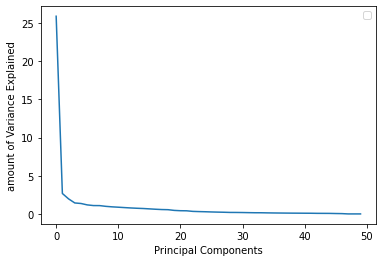

In [104]:
#Q8.c
fig,ax=plt.subplots()
ax.plot(pca.explained_variance_)
ax.set_xlabel("Principal Components")
ax.set_ylabel("amount of Variance Explained")
ax.legend()


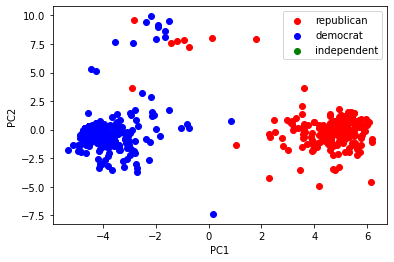

In [105]:
#Q8.d
data_frame_116=pd.read_csv("p5-data/congress/H110_votes.csv")
data_frame_116_cut=data_frame_116.iloc[:,8:]
data_frame_116_trans=StandardScaler().fit_transform(data_frame_116_cut)
data_frame_116_trans=pd.DataFrame(data_frame_116_trans,columns=data_frame_116_cut.columns)


pca = PCA()
pca.fit(data_frame_116_trans)
X=pca.transform(data_frame_116_trans)

fig,ax=plt.subplots()
color_map={200:"r",100:"b",328:"g"}
label_map={200:"republican",100:"democrat",328:"independent"}

for code in [200,100,328]:
    index=np.where(data_frame_116['PartyCode']==code)
    ax.scatter(X[index,0],X[index,1],c=color_map[code],label=label_map[code])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()

the result shows the speech is well grouped by party!


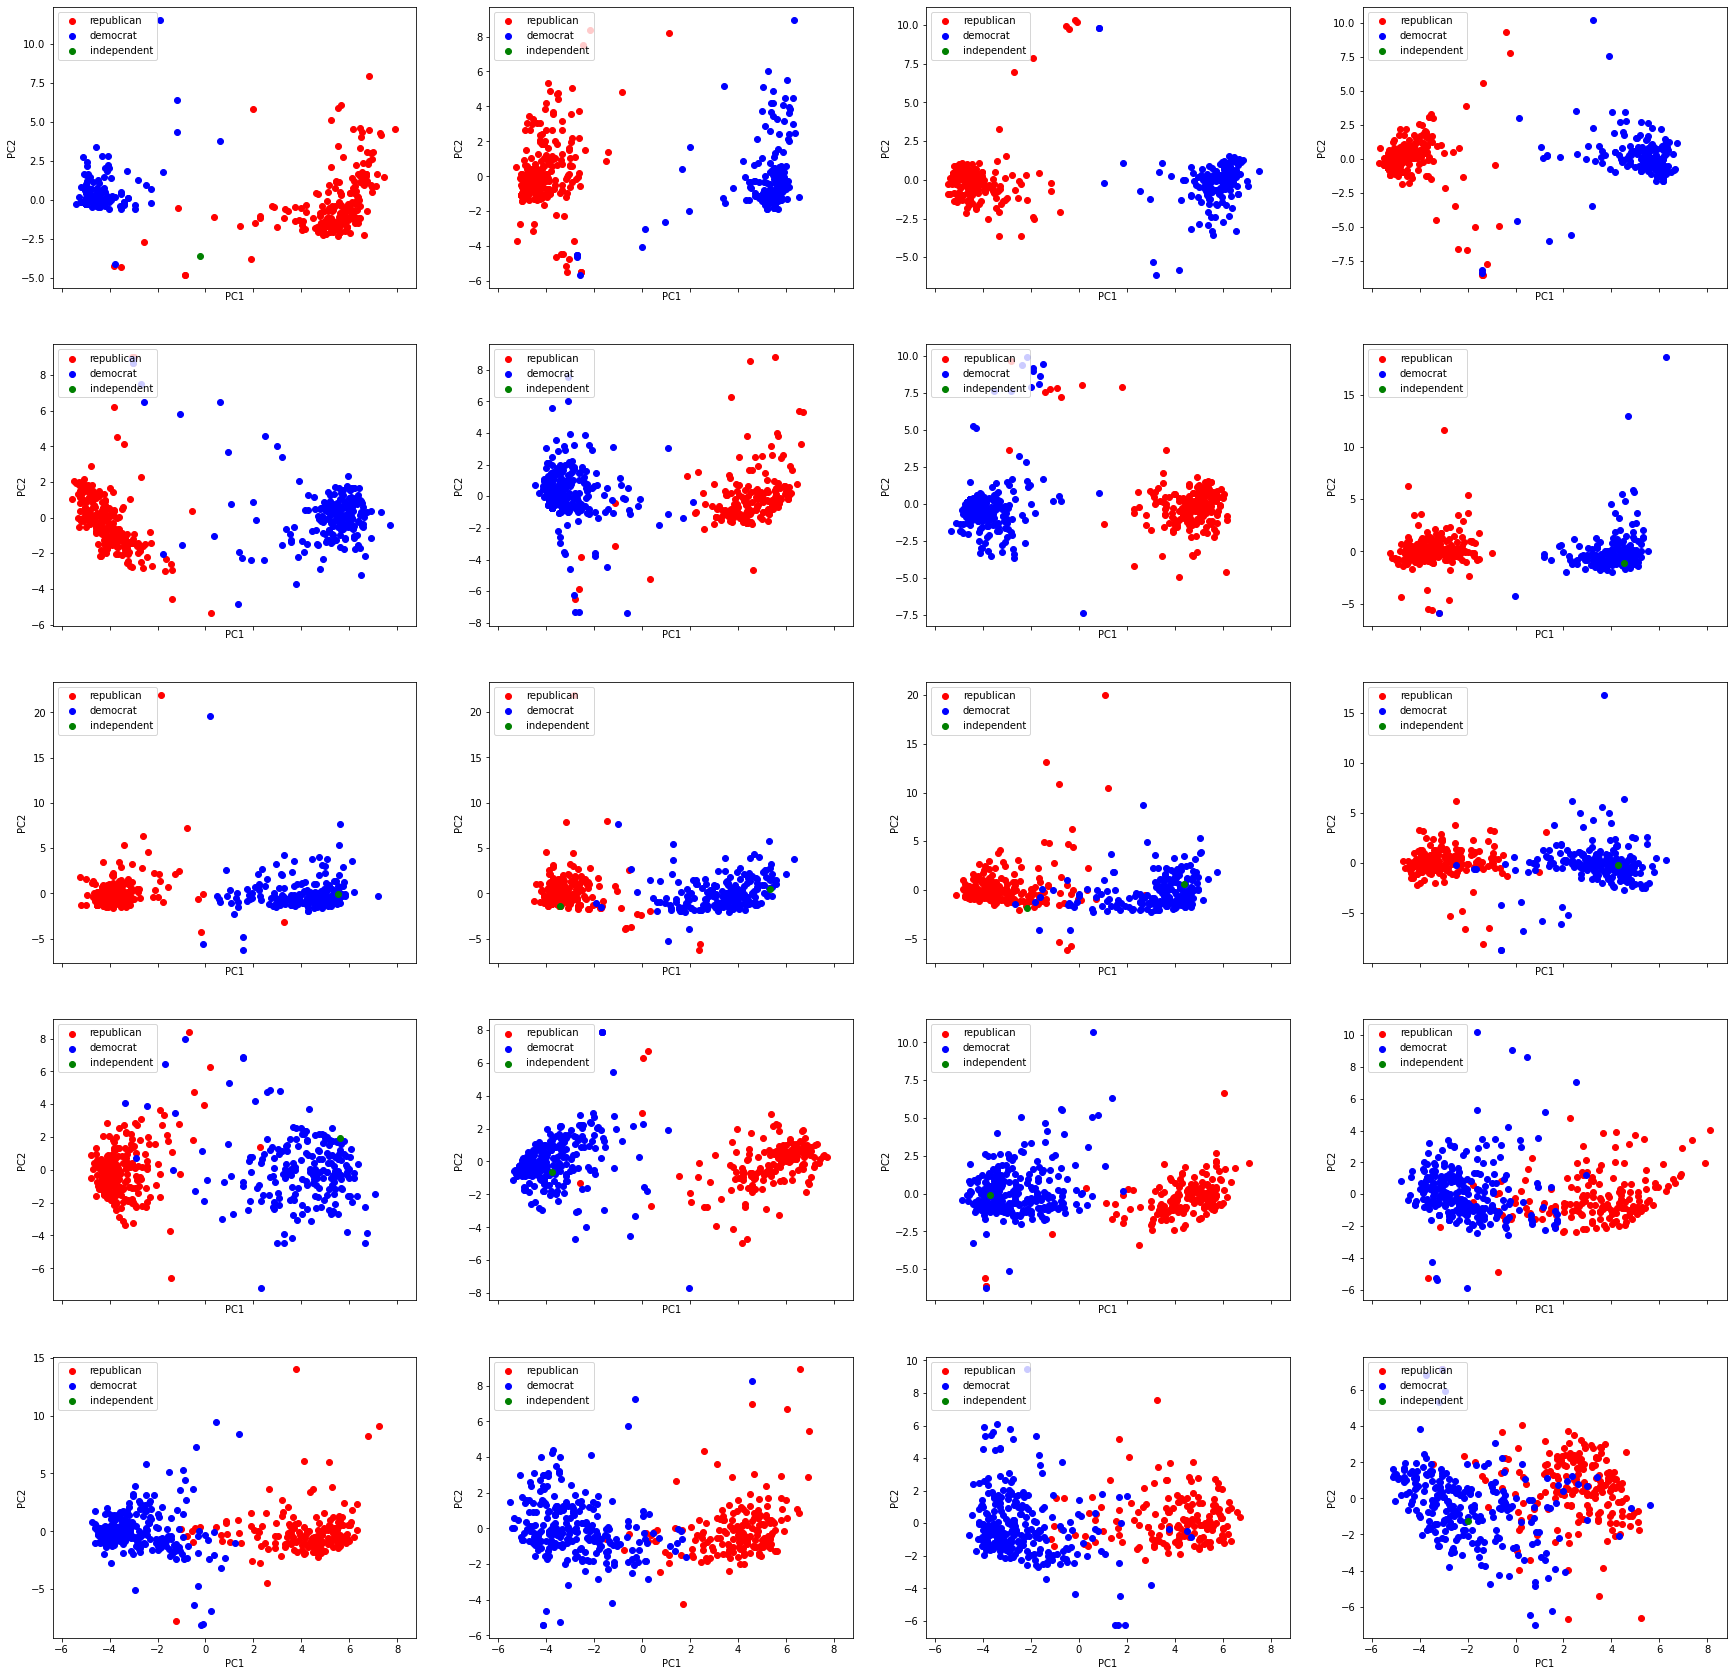

In [111]:
#Q8.e
fig,ax=plt.subplots(5,4,sharex=True,figsize=(30,30))
for i in range(5):
    for j in range(4):
        file_name=f"H{116-(i*4+j)}_votes.csv"
        data_frame=pd.read_csv(f"p5-data/congress/{file_name}")
        data_frame_cut=data_frame.iloc[:,8:]
        data_frame_trans=StandardScaler().fit_transform(data_frame_cut)
        data_frame_trans=pd.DataFrame(data_frame_trans,columns=data_frame_cut.columns)


        pca = PCA()
        pca.fit(data_frame_trans)
        X=pca.transform(data_frame_trans)

        color_map={200:"r",100:"b",328:"g"}
        label_map={200:"republican",100:"democrat",328:"independent"}

        for code in [200,100,328]:
            index=np.where(data_frame['PartyCode']==code)
            ax[i][j].scatter(X[index,0],X[index,1],c=color_map[code],label=label_map[code])

        ax[i][j].set_xlabel('PC1')
        ax[i][j].set_ylabel('PC2')
        ax[i][j].legend(loc="upper left")
print("the result shows the speech is well grouped by party!")